# Author: Makayla McKibben
## Course: DSC530 Data Exploration and Analysis
## Exercise: 8.2
## Date: 10.25.2024

## Ex. 9-1

In [3]:
# Import relevant libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from os.path import basename, exists
import math
from thinkstats2 import Mean, MeanVar, Var, Std, Cov

In [4]:
# Get data
def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/brfss.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/CDBRFS08.ASC.gz")

In [5]:
# Import relevant datasets and libraries
from __future__ import print_function, division
import nsfg
import first
import thinkstats2
import thinkplot
import hypothesis
import numpy as np
import warnings
import brfss
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
# Select all live births
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]
live.head(18)

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875
5,6,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.5625
6,6,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,9.5625
7,6,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.3750
8,7,1,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,7.5625
9,7,2,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,6.6250


In [7]:
# Defines function run_tests which runs all the tests for chapter nine in Think Stats
def run_tests(live, iters = 1000):
    # Filter for firstborns
    firsts = live[live.birthord == 1]
    # Filter for all others
    others = live[live.birthord != 1]

    # Get random rows from firsts and others
    data_1 = thinkstats2.SampleRows(firsts.prglngth, nrows = 4800, replace = True)
    data_o = thinkstats2.SampleRows(others.prglngth, nrows = 4800, replace = True)
    # Consolidate data
    data = data_1, data_o
    # Find the difference in means by shuffling the data 
    # "One way to model the null hypothesis is by permutation"
    # Permutations are just differently organized groups of the same data
    ht = hypothesis.DiffMeansPermute(data)
    # Calculate p-value for the means
    p_val1 = ht.PValue(iters = iters)
    # Print the p-value
    print('P-value 1: ', p_val1)

    # Get random rows from firsts and others total weight in lbs removing NaN
    data_1 = thinkstats2.SampleRows(firsts.totalwgt_lb.dropna(), nrows = 2200, replace = True)
    data_o = thinkstats2.SampleRows(others.totalwgt_lb.dropna(), nrows = 2200, replace = True)
    # Consolidate data
    data = data_1, data_o
    # Find the difference in means by shuffling the data 
    # "One way to model the null hypothesis is by permutation"
    # Permutations are just differently organized groups of the same data
    ht = hypothesis.DiffMeansPermute(data)
    # Calculate p-value for the means
    p_val2 = ht.PValue(iters = iters)
    # Print p-value
    print('P-value 2: ', p_val2)

    # Subset the data and drop NaN
    live2 = live.dropna(subset = ['agepreg', 'totalwgt_lb'])
    # Get random rows
    data_1 = thinkstats2.SampleRows(live2.agepreg, nrows = 9000, replace = True)
    data_2 = thinkstats2.SampleRows(live2.totalwgt_lb, nrows = 9000, replace = True)
    # Consolidate random rows
    data = data_1, data_2
    # Shuffles the data to simulate as if the variables are unrelated to test for correlation
    ht = hypothesis.CorrelationPermute(data)
    # Find the p-value
    p_val3 = ht.PValue(iters = iters)
    # Print the p-value
    print('P-value 3: ', p_val3)

    # Get random rows of pregnancy length from firsts and others
    data_1 = thinkstats2.SampleRows(firsts.prglngth, nrows = 1100, replace = True)
    data_o = thinkstats2.SampleRows(others.prglngth,  nrows = 1100, replace = True)
    # Consolidate data
    data = data_1, data_o
    # Shuffles the pooled data then checks if they are the same when split into two parts
    ht = hypothesis.PregLengthTest(data)
    # Find p-value
    p_val4 = ht.PValue(iters = iters)
    # Print p-value
    print('P-value 4: ', p_val4)

After tweaking the number of rows I was unable to get p-value for the third that was less than 0.001. I continued messing with it in the next three code blocks

In [9]:
# Run the function run_tests
run_tests(live)

P-value 1:  0.042
P-value 2:  0.007
P-value 3:  0.849
P-value 4:  0.001


In [10]:
# Try to isolate p-value 3 that does not want to drop no matter how many rows I throw at it
# Create empty list for p-values
p_values = []
for _ in range (0, 1000):
    # Subset the data and drop NaN
    live2 = live.dropna(subset = ['agepreg', 'totalwgt_lb'])
    # Get random rows
    data_1 = thinkstats2.SampleRows(live2.agepreg, nrows = 9038, replace = True)
    data_2 = thinkstats2.SampleRows(live2.totalwgt_lb, nrows = 9038, replace = True)
    # Consolidate random rows
    data = data_1, data_2
    # Shuffles the data to simulate as if the variables are unrelated to test for correlation
    ht = hypothesis.CorrelationPermute(data)
    # Find the p-value
    p_val3 = ht.PValue(iters = 1000)    
    # Print the p-value
    print('P-value 3: ', p_val3)
    p_values.append(p_val3)

P-value 3:  0.552
P-value 3:  0.418
P-value 3:  0.169
P-value 3:  0.404
P-value 3:  0.884
P-value 3:  0.505
P-value 3:  0.318
P-value 3:  0.989
P-value 3:  0.764
P-value 3:  0.217
P-value 3:  0.092
P-value 3:  0.345
P-value 3:  0.951
P-value 3:  0.025
P-value 3:  0.33
P-value 3:  0.201
P-value 3:  0.872
P-value 3:  0.779
P-value 3:  0.49
P-value 3:  0.559
P-value 3:  0.31
P-value 3:  0.512
P-value 3:  0.977
P-value 3:  0.16
P-value 3:  0.771
P-value 3:  0.251
P-value 3:  0.602
P-value 3:  0.499
P-value 3:  0.475
P-value 3:  0.582
P-value 3:  0.607
P-value 3:  0.487
P-value 3:  0.193
P-value 3:  0.343
P-value 3:  0.832
P-value 3:  0.819
P-value 3:  0.65
P-value 3:  0.508
P-value 3:  0.221
P-value 3:  0.391
P-value 3:  0.262
P-value 3:  0.595
P-value 3:  0.159
P-value 3:  0.976
P-value 3:  0.285
P-value 3:  0.631
P-value 3:  0.29
P-value 3:  0.546
P-value 3:  0.327
P-value 3:  0.151
P-value 3:  0.457
P-value 3:  0.72
P-value 3:  0.446
P-value 3:  0.443
P-value 3:  0.935
P-value 3:  0.224

In [11]:
# Create counter
n = 0
# Set up for loop with i for iterating through the list
for i in range (0, len(p_values)):
    # Count if p_value is positive
    if p_values[i] <= 0.001:
        n += 1
# Display number of positives
n

1

## 10-1

Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone's weight, how much would it help to know their height?

    

In [14]:
# Define the LeastSquares function which calculates the slope and intercept of the least squares fit
def LeastSquares(x, y):
    # Find the mean and variance of x
    meanx, varx = MeanVar(x)
    # Find the mean of y
    meany = Mean(y)

    # Find slope 
    slope = Cov(x, y, meanx, meany) / varx
    # Find intercept
    intercept = meany - slope * meanx

    return intercept, slope

In [15]:
# Read the BRFSS data
brfss = brfss.ReadBrfss(nrows = None)

In [16]:
# Drop NaN from the height and weight columns we're interested in
brfss = brfss.dropna(subset = ['htm3', 'wtkg2'])

In [17]:
# Assign heights and weights to individual variables
heights, weights = brfss.htm3, brfss.wtkg2

In [18]:
# Convert to log weights
log_wgt = np.log10(weights)

In [19]:
# Run the least squares function to get intercept and slope
intercept, slope = LeastSquares(heights, log_wgt)
# Display intercept and slope
intercept, slope

(0.9930804163932798, 0.005281454169417823)

Text(0.5, 0, 'height')

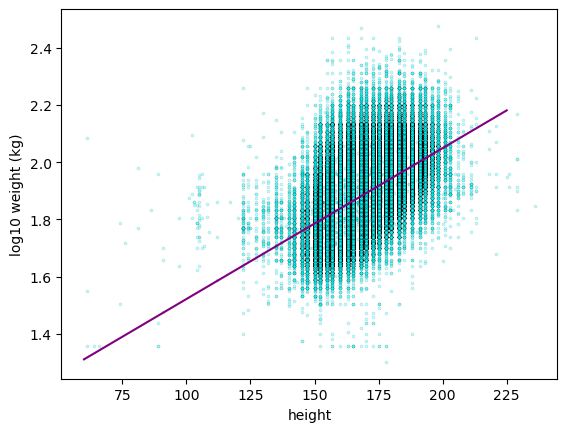

In [20]:
# Plot the data as best way to show the relationship
# Plot fitted line
plt.plot([60, 225], [slope * 60 + intercept, slope * 225 + intercept], color = 'purple')
# Plot all the data points
plt.scatter(heights, log_wgt, alpha = 0.28, s = 5, color = 'cyan', edgecolors = 'black', linewidths = 0.18)
plt.ylabel('log10 weight (kg)')
plt.xlabel('height')

In [21]:
# Find out how useful someone's height is for guessing their weight
# Create empty list for p-values
p_values = []
for _ in range (0, 1000):
    # Get random rows
    data_1 = thinkstats2.SampleRows(heights, nrows = 1800, replace = True)
    data_2 = thinkstats2.SampleRows(log_wgt, nrows = 1800, replace = True)
    # Consolidate random rows
    data = data_1, data_2
    # Shuffles the data to simulate as if the variables are unrelated to test for correlation
    ht = hypothesis.CorrelationPermute(data)
    # Find the p-value
    p_val = ht.PValue(iters = 1000)    
    # Print the p-value
    print('P-value 3: ', p_val)
    p_values.append(p_val)

P-value 3:  0.556
P-value 3:  0.068
P-value 3:  0.592
P-value 3:  0.235
P-value 3:  0.101
P-value 3:  0.172
P-value 3:  0.87
P-value 3:  0.08
P-value 3:  0.971
P-value 3:  0.678
P-value 3:  0.028
P-value 3:  0.463
P-value 3:  0.238
P-value 3:  0.214
P-value 3:  0.21
P-value 3:  0.551
P-value 3:  0.493
P-value 3:  0.872
P-value 3:  0.477
P-value 3:  0.916
P-value 3:  0.037
P-value 3:  0.045
P-value 3:  0.918
P-value 3:  0.665
P-value 3:  0.714
P-value 3:  0.113
P-value 3:  0.175
P-value 3:  0.619
P-value 3:  0.843
P-value 3:  0.038
P-value 3:  0.456
P-value 3:  0.298
P-value 3:  0.366
P-value 3:  0.044
P-value 3:  0.4
P-value 3:  0.223
P-value 3:  0.533
P-value 3:  0.396
P-value 3:  0.737
P-value 3:  0.754
P-value 3:  0.344
P-value 3:  0.198
P-value 3:  0.31
P-value 3:  0.129
P-value 3:  0.95
P-value 3:  0.853
P-value 3:  0.702
P-value 3:  0.355
P-value 3:  0.608
P-value 3:  0.948
P-value 3:  0.916
P-value 3:  0.372
P-value 3:  0.947
P-value 3:  0.668
P-value 3:  0.894
P-value 3:  0.054

In [22]:
# Create counter
n = 0
# Set up for loop with i for iterating through the list
for i in range (0, len(p_values)):
    # Count if p_value is positive
    if p_values[i] <= 0.001:
        n += 1
# Display number of positives
n

1

Two times out of a thousand there is a real correlation where it would be useful to know someone's height to predict their weight. This, to me, indicates that it is not a helpful metric to use.

In [24]:
# Create empty list
t = []
# Create for loop
for _ in range (100):
    # Resample
    sample = thinkstats2.ResampleRows(brfss)
    # Get least squares estimates
    estimates = LeastSquares(sample.htm3, np.log10(sample.wtkg2))
    # Append to list
    t.append(estimates)

In [25]:
# Find the intercepts and slopes from the list t we just made from resampled rows
intercepts, slopes = zip(*t)

In [26]:
# Make CDF of the slopes
cdf = thinkstats2.Cdf(slopes)

(array([0.00523, 0.00524, 0.00525, 0.00526, 0.00527, 0.00528, 0.00529,
        0.0053 , 0.00531, 0.00532, 0.00533]),
 [Text(0.005229999999999999, 0, '0.00523'),
  Text(0.005239999999999999, 0, '0.00524'),
  Text(0.0052499999999999995, 0, '0.00525'),
  Text(0.005259999999999999, 0, '0.00526'),
  Text(0.0052699999999999995, 0, '0.00527'),
  Text(0.005279999999999999, 0, '0.00528'),
  Text(0.0052899999999999996, 0, '0.00529'),
  Text(0.005299999999999999, 0, '0.00530'),
  Text(0.00531, 0, '0.00531'),
  Text(0.005319999999999999, 0, '0.00532'),
  Text(0.00533, 0, '0.00533')])

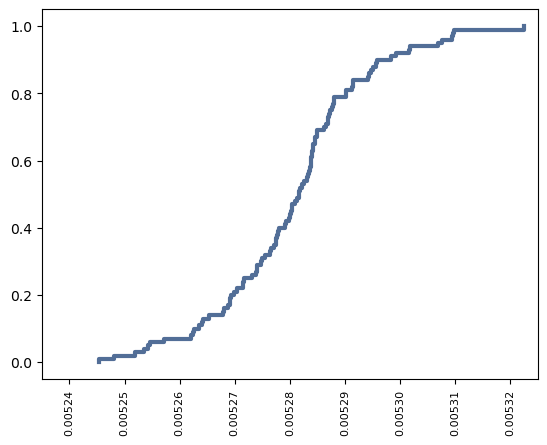

In [27]:
# Plot CDF
thinkplot.Cdf(cdf)
# Set x range
plt.xlim(0.005235, 0.005325)
# Rotate values so they're easier to read
plt.xticks(rotation = 90, size = 8)

In [28]:
# Find the mean
mean_slopes = Mean(slopes)
mean_slopes

0.005280710009034354

In [29]:
# Find 90% confidence interval
con_int_90 = cdf.Percentile(5), cdf.Percentile(95)
con_int_90

(0.0052541810592457066, 0.005306916847733232)

In [30]:
# Find standard error
std_err = thinkstats2.Std(slopes)
std_err

1.3847267597417501e-05

In [31]:
# Resample heights from brfss
estimates_unweighted = [thinkstats2.ResampleRows(brfss).htm3.mean() for _ in range (100)]
# Find the mean
unweight_mean = Mean(estimates_unweighted)
# Find the std. error
unweight_err = thinkstats2.Std(estimates_unweighted)
# Make CDF of the unweighted heights
cdf = thinkstats2.Cdf(estimates_unweighted)
# Find 90% confidence interval
unweight_ci = cdf.Percentile(5), cdf.Percentile(95)

In [33]:
# Resample heights from brfss
estimates_weighted = [thinkstats2.ResampleRowsWeighted(brfss, 'finalwt').htm3.mean() for _ in range (100)]
# Find the mean
weight_mean = Mean(estimates_weighted)
# Find the std. error
weight_err = thinkstats2.Std(estimates_weighted)
# Make CDF of the unweighted heights
cdf = thinkstats2.Cdf(estimates_weighted)
# Find 90% confidence interval
weight_ci = cdf.Percentile(5), cdf.Percentile(95)

In [32]:
print('The unweighted mean {}, std. error {}, and 90% confidence interval {}.'.format(unweight_mean, unweight_err, unweight_ci))

The unweighted mean 168.95215341356936, std. error 0.01580471020538022, and 90% confidence interval (168.92718122839992, 168.98120919986258).


In [34]:
print('The unweighted mean {}, std. error {}, and 90% confidence interval {}.'.format(weight_mean, weight_err, weight_ci))

The unweighted mean 170.49430124396207, std. error 0.01749727096190194, and 90% confidence interval (170.46267103215504, 170.52200175832172).


There is a ~1.5cm difference between the weighted and unweighted means. This indicates that weighting is a relevant scaling factor to be included.